# Summary

<p>
A <b>simulation</b> as it is understood here is an approximate imitation of a process or system
over a sequence. The sequence can be time but also any other type.
</p> 

<p>
This project tries to develop solutions for certain business problems with simulations of
<b>probability distributions</b>.
In this context, it helps bring into mind that simulations
are nothing more than a tool under uncertainty. A simulation gives a range 
of possible outcomes depending on input probabilities. 
Are these outcomes acceptable or not? Simulations are techniques for estimating the risk
someone is willing to carry. Testing out different probability levels with charts and histograms are a search to find the desired level of risk and outcome. 
</p> 
<p>    
A <b>Monte Carlo simulation</b> is not a stringent mathematical solution. It cannot be as it applies the concept of randomness. A MC is also not a model but a technique for enriching the data, when empirical data is sparse and collecting more data would be too costly. The art of simulation is understanding the problem, fitting the adequate probability distribution, calculate the moments, and run experiments. 
</p> 

<p>
This project approaches the topic of simulations from the Bernoulli distribution,
then goes to the binomial distribution, and then applies MC to a geometric probability
distribution problem.
</p> 

## Import packages

In [428]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed, randint
import pandas as pd
import collections
import statistics

# from scipy.stats import bernoulli
import scipy.stats as stats
from scipy.stats import bernoulli

# checks
# print(sns.__file__)

## Bernoulli trials - the coin toss experiments
<ul>
<li>Toss the coin many times.</li>
<li>Count the outcomes of head or tail.</li>
<li>Divide the count of outcomes by the number of tosses.</li>
</ul>

<p>
This give the empirical or experimental probability, which are relative frequencies.<br>
In contrast theoretical probability is given by an assumed standardized distribution.<br>
A distribution with two possible results is called a Bernoulli.<br> 
It is a special case of a binonmial distribution.
</p>

In [429]:
# number of mint tosses: 200 

# experiment 1
p_head = 97 / 200
# experiment 1
p_tail = (200-97) / 200

#  number of times throwing the dice

# experiment 3 - count 6
p_six = 66 / 200
# experiment 4
p_odd = 102 / 200

print(p_head)
print(p_tail)
print(p_six)
print(p_odd)

0.485
0.515
0.33
0.51


Convert proportions to percentages

In [430]:
p_head_percentage = p_head * 100
p_tail_percentage = p_tail* 100
p_six_percentage = p_six * 100
p_odd_percentage = p_odd * 100

print(p_head_percentage, p_tail_percentage, p_six_percentage, p_odd_percentage)

48.5 51.5 33.0 51.0


In [431]:
proportion_heads_A = (500-171)/500
percentage_A = proportion_heads_A * 100
proportion_heads_B = (8000 -  4350) / 8000 
percentage_B = proportion_heads_B * 100
print(np.round(proportion_heads_A, 2), percentage_A)
print(np.round(proportion_heads_B, 2), np.round(percentage_B, 2))

0.66 65.8
0.46 45.62


#### Expected value in Bernoulli experiments

The expected value of head, when tossing a coin 10.000 times, is 50 percent.
According to the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers):<br>
'According to the law, the average of the results obtained from a large number of trials  should be close to the expected value, <br>and will tend to become closer as more trials are performed.'
<p>
This now proven with a randomized experiment of coin tosses.
</p>


In [432]:
def tossing_the_mint():
    # The randint() method returns an integer number selected element from the specified range.
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'
seed(1)

probabilities_head = []
head = 0

for i in range(1, 10001):
    result = tossing_the_mint()
    if result == 'HEAD':
        head += 1
    probability_present = round(head / i , 4)
    probabilities_head.append(probability_present)
   
print(len(probabilities_head))

10000


The first 25 probabilities are fluctuating.

In [433]:
print(probabilities_head[0:25])


[1.0, 1.0, 0.6667, 0.5, 0.6, 0.6667, 0.7143, 0.75, 0.7778, 0.7, 0.6364, 0.6667, 0.6154, 0.6429, 0.6667, 0.625, 0.5882, 0.6111, 0.5789, 0.55, 0.5238, 0.5455, 0.5217, 0.5, 0.52]


In [434]:
print(probabilities_head[5000:5005])

[0.4947, 0.4946, 0.4945, 0.4946, 0.4945]


In [435]:
print(probabilities_head[-10:])

[0.4993, 0.4994, 0.4993, 0.4994, 0.4993, 0.4993, 0.4993, 0.4994, 0.4993, 0.4994]


The more often the mint is tossed the more the probability approaches the expected value or true value of  0.5.

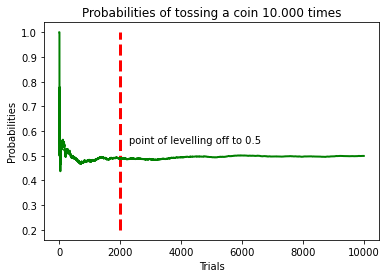

In [436]:
plt.plot(probabilities_head, color="green", linewidth=2)
plt.title("Probabilities of tossing a coin 10.000 times")
plt.xlabel("Trials")
plt.ylabel("Probabilities")
plt.vlines(x=2000, ymin=0.2, ymax=1, color="red", linestyle = "dashed",
           linewidth=3)
plt.annotate('point of levelling off to 0.5',xy=(2300, 0.55))
plt.show()

Latest at 2000 trials the probabilities are levelling off to 0.5.

#### Scipy stats 

offers a range of Bernoulli functions.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html" 
 target="_blank">scipy.stats.bernoulli</a> 

In [437]:
# this calculates the statistics of a bernoulli distribution
# given a probability of success p

p = 0.5
mean_1, var_1, skew_1, kurt_1 = bernoulli.stats(p, moments='mvsk')

print(mean_1, var_1, skew_1, kurt_1)

0.5 0.25 0.0 -2.0


Calculating discret random results of 10.000 binonmial trials (size) or coin tosses.

In [438]:
ber_rvs = bernoulli.rvs(p=0.5, size=10000)
print(ber_rvs)

ber_rvs_1 = sum(ber_rvs == 1)
print(ber_rvs_1 )
ber_rvs_0 = 10000 - ber_rvs_1
print(ber_rvs_0)

[1 1 0 ... 1 0 1]
5040
4960


Proportions

In [439]:
print(4940/10000) # 1
print(5060/10000) # 0

0.494
0.506


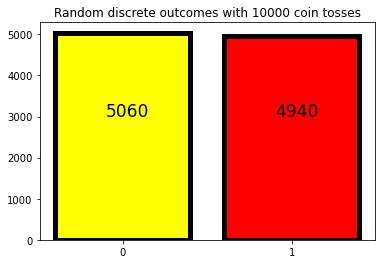

In [440]:
plt.figure(figsize=(6,4))
plt.bar([1,0], [ber_rvs_0, ber_rvs_1], align='center',
        edgecolor="black", linewidth=5, color=['r', 'yellow'],
        tick_label=[1,0])
plt.title("Random discrete outcomes with 10000 coin tosses")
plt.annotate("5060", xy=(-0.1,3000), fontsize=17)
plt.annotate("4940", xy=(0.9,3000), fontsize=17)
plt.show()

Probability mass function gives the probability that the discrete random variable is 
equal to a value.<br>
In case of the Bernoulli function the probabilities of 1 and 0 are equal to 0.5, if the coin is fair.<br>
The probability of 34534534 on the other is hand 0.

In [441]:
ber_rvs_2 = bernoulli.rvs(p=0.5, size=50000)

# import collections
print(collections.Counter(ber_rvs_2))

# absolute numbers
print(collections.Counter(ber_rvs_2)[0])
print(collections.Counter(ber_rvs_2)[1])

Counter({1: 25019, 0: 24981})
24981
25019


In [442]:
# proportions
ber_rvs_20 = collections.Counter(ber_rvs_2)[0]/50000
print(collections.Counter(ber_rvs_2)[0]/50000)

ber_rvs_21 = collections.Counter(ber_rvs_2)[1]/50000
print(collections.Counter(ber_rvs_2)[1]/50000)

0.49962
0.50038


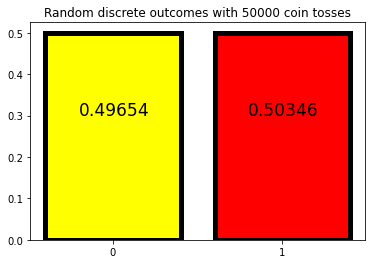

In [443]:
plt.figure(figsize=(6,4))
plt.bar([1,0], [ber_rvs_20, ber_rvs_21], align='center',
        edgecolor="black", linewidth=5, color=['r', 'yellow'],
        tick_label=[1,0])
plt.title("Random discrete outcomes with 50000 coin tosses")
plt.annotate("0.49654", xy=(-0.2,0.3), fontsize=17)
plt.annotate("0.50346", xy=(0.8,0.3), fontsize=17)
plt.show()

In [444]:
print(bernoulli.pmf(1, p, loc=0))
print(bernoulli.pmf(0, p, loc=0))

print(bernoulli.pmf(0, p, loc=34534534))

0.5
0.5
0.0


In [445]:
print(bernoulli.cdf(0, p, loc=0))
print(bernoulli.cdf(1, p, loc=0))

0.5
1.0


## Binomial distribution

<p>
results from an independent and evenly distributed sequence of Bernoulli trials.
A Bernoulli trial is a random experiment with only two different outcomes.
The binomial coefficient is calculated with this formula applying "factorials".
Factorials are read "n choose k" or there are n-ways to choose k-elements from a given set of numbers (n).
</p> 

<p>
<a href="https://en.wikipedia.org/wiki/Binomial_coefficient">
<img src="binomialCoefficient.svg" alt="Smiley face" height="200" width="200"> 
</a>
</p> 

<p>
These are examples for calculating Binomial Coefficients:
</p> 

<p>
<a href="http://image3.slideserve.com/6615361/8-4-evaluating-binomial-coefficients-n.jpg">
<img src="BinomialCoefEx.jpg" alt="Smiley face" height="300" width="250"> 
</a>
</p

<p>
Bernoulli and Binomial experiments are easily mixed up, if you think to much about it.
A further explanation is given here:
<a href="https://www.differencebetween.com/difference-between-bernoulli-and-vs-binomial/">
Difference Between Bernoulli and Binomial
</a>
</p> 

<p>
The function scipy.stats.binom offers three main arguments, where n is the set of numbers choosing from,
p is the probability of success (head), and size is the number of trials (or coin tosses) conducted.<br>
<a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html">
scipy.stats.binom
</a>
</p> 

### Playing around with the main arguments

Changing the set of numbers (n) to choose from, while holding all other arguments constant. 

In [446]:
np.random.seed(5464)

# This is a bernoulli trial
draws_0250 = stats.binom.rvs(n=2, p=0.5, size=10)
print(draws_0250)
print(len(draws_0250))

draws_5050 = stats.binom.rvs(n=50, p=0.5, size=10)
print(draws_5050)
print(len(draws_5050))

draws_40050 = stats.binom.rvs(n=400, p=0.5, size=10)
print(draws_40050)
print(len(draws_40050))

draws_10000000 = stats.binom.rvs(n=10000000, p=0.5, size=10)
print(draws_10000000)
print(len(draws_10000000))

[2 0 2 2 0 2 0 1 2 2]
10
[27 27 21 23 26 30 27 21 27 25]
10
[195 202 202 199 202 201 188 198 203 189]
10
[4997991 4999679 5001592 5001288 4997307 4999454 4999004 4997898 4999430
 5000426]
10


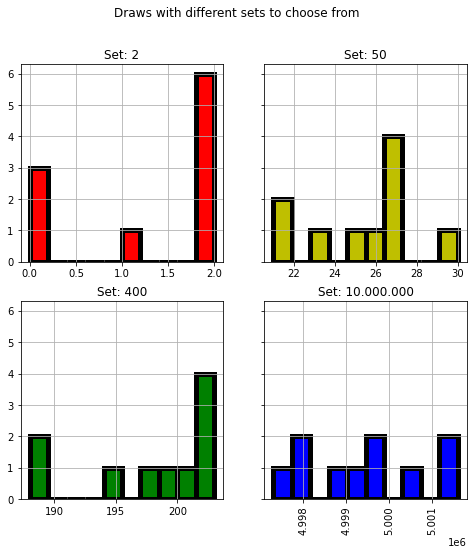

In [447]:
fig, axes =  plt.subplots(nrows=2, ncols=2, sharey=True, sharex=False, figsize=[8,8])
fig.suptitle('Draws with different sets to choose from', fontsize=12)

axes[0,0].hist(draws_0250, color="r", edgecolor="black", linewidth="5")
axes[0,0].grid(True)
axes[0,0].set_title("Set: 2")
axes[0,1].hist(draws_5050, color="y", edgecolor="black", linewidth="5")
axes[0,1].grid(True)
axes[0,1].set_title("Set: 50")
axes[1,0].hist(draws_40050, color="g", edgecolor="black", linewidth="5")
axes[1,0].grid(True)
axes[1,0].set_title("Set: 400")
axes[1,1].hist(draws_10000000, color="b", edgecolor="black", linewidth="5")
axes[1,1].grid(True)
axes[1,1].set_title("Set: 10.000.000")
plt.xticks(rotation=90)

plt.show()

Changing the numbers of trials (size) while holding all other arguments constant.

In [448]:
draws_40501000 = stats.binom.rvs(n=40, p=0.5, size=100)
print(len(draws_40501000))

draws_40502000 = stats.binom.rvs(n=40, p=0.5, size=2000)
print(len(draws_40502000))

draws_40501000000 = stats.binom.rvs(n=40, p=0.5, size=1000000)
print(len(draws_40501000000))

draws_405020000000 = stats.binom.rvs(n=40, p=0.5, size=20000000)
print(len(draws_405020000000))

100
2000
1000000
20000000


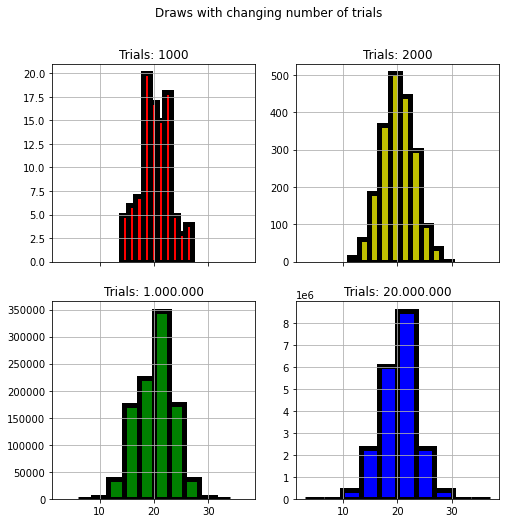

In [449]:
fig, axes =  plt.subplots(nrows=2, ncols=2, sharey=False, sharex=True, figsize=[8,8])
fig.suptitle('Draws with changing number of trials', fontsize=12)

axes[0,0].hist(draws_40501000, color="r", edgecolor="black", linewidth="5")
axes[0,0].grid(True)
axes[0,0].set_title("Trials: 1000")
axes[0,1].hist(draws_40502000, color="y", edgecolor="black", linewidth="5")
axes[0,1].grid(True)
axes[0,1].set_title("Trials: 2000")
axes[1,0].hist(draws_40501000000, color="g", edgecolor="black", linewidth="5")
axes[1,0].grid(True)
axes[1,0].set_title("Trials: 1.000.000")
axes[1,1].hist(draws_405020000000, color="b", edgecolor="black", linewidth="5")
axes[1,1].grid(True)
axes[1,1].set_title("Trials: 20.000.000")

plt.show()

Last but not least changing the probabilities, while holding all other arguments constant.

In [450]:
np.random.seed(123)

draws_0 = stats.binom.rvs(n=10, p=0, size=10000)
print(draws_0)
print(len(draws_0))

draws_2 = stats.binom.rvs(n=10, p=0.2, size=10000)
print(draws_2)
print(len(draws_2))

draws_5 = stats.binom.rvs(n=10, p=0.5, size=10000)
print(draws_5)
print(len(draws_5))

draws_8 = stats.binom.rvs(n=10, p=0.8, size=10000)
print(draws_8)
print(len(draws_8))

draws_1 = stats.binom.rvs(n=10, p=1, size=10000)
print(draws_1)
print(len(draws_1))

[0 0 0 ... 0 0 0]
10000
[2 3 3 ... 2 1 1]
10000
[3 5 5 ... 3 7 5]
10000
[6 8 8 ... 8 9 9]
10000
[10 10 10 ... 10 10 10]
10000


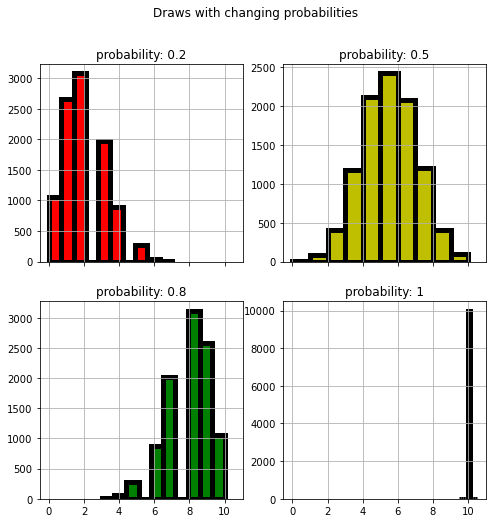

In [451]:
fig, axes =  plt.subplots(nrows=2, ncols=2, sharey=False, sharex=True, figsize=[8,8])
fig.suptitle('Draws with changing probabilities', fontsize=12)

axes[0,0].hist(draws_2, color="r", edgecolor="black", linewidth="5")
axes[0,0].grid(True)
axes[0,0].set_title("probability: 0.2")
axes[0,1].hist(draws_5, color="y", edgecolor="black", linewidth="5")
axes[0,1].grid(True)
axes[0,1].set_title("probability: 0.5")
axes[1,0].hist(draws_8, color="g", edgecolor="black", linewidth="5")
axes[1,0].grid(True)
axes[1,0].set_title("probability: 0.8")
axes[1,1].hist(draws_1, color="b", edgecolor="black", linewidth="5")
axes[1,1].grid(True)
axes[1,1].set_title("probability: 1")

plt.show()

### Expected values (means) and variances in binomial experiments

<p>
The expected values (E) or means of probability distributions of which the 
binomial distribution is one case, is a weighted average of the random
variables (X) times the probabilities: E = sum(n*p). 
The expected value is the most likely value of all outcomes. 
It works as a simple prediction.
Deviations from the mean are understood in terms of the variance.
The variance (V) is the degree of dispersion around the 
expected value: V = E * (1-p). 
</p> 

<p>
For example in finance the variance or standard deviations is important as it
indicates the uncertainty or risk of getting a special (desirable) outcome.
</p> 

<p>
Python an scipy.stats offer different options for calculating E and V.
The central function is "stats.binom.stats(n, p, moments='mvsk')".
It calculates the statistical moments of a theoretical binomial distribution
from n and p.
</p> 



In [452]:
n, p = 10, 0.25

mean_11, var_11, skew_11, kurt_11 = stats.binom.stats(n, p, moments='mvsk')
print(mean_11, var_11, skew_11, kurt_11)


2.5 1.875 0.3651483716701107 -0.06666666666666667


The scipy.stats.describe function calculation moments for 
a given number of values.

In [453]:
# bernoulli experiment n=1 generates the given number of values randomly.
coinflip_111 = stats.binom.rvs(n=1, p=0.5, size=100)

stats.describe(coinflip_111)

DescribeResult(nobs=100, minmax=(0, 1), mean=0.44, variance=0.24888888888888894, skewness=0.24174688920761425, kurtosis=-1.9415584415584415)

In [454]:
E111 = stats.describe(coinflip_111).mean
print(E111)

V111 = stats.describe(coinflip_111).variance
print(V111)

0.44
0.24888888888888894


#### Difference between a theoretical distribution and a simulation

<p>
At first a binomial experiment with n = 100 possible outcomes is conducted.
</p> 


In [455]:
# n is the number of possible outcomes
n_222, p_222 = 40, 0.45
print("n_222:", n_222)
print("p_222:", p_222)


n_222: 40
p_222: 0.45


In [456]:
np.random.seed(34)

sample_222 = stats.binom.rvs(n=n_222, p=p_222, size=100)

print(sample_222 )
print(np.unique(sample_222))

print(len(sample_222))
print(sample_222.min())
print(sample_222.max())



[12 20 14 19 11 23 17 16 15 17 11 19 22 19 21 21 16 21 16 15 20 18 18 17
 23 14 22 15 18 15 15 18 22 23 21 18 21 23 21 18 17 14 25 15 16 20 19 16
 21 18 14 12 19 15 16 12 19 21 15 21 14 19 21 16 18 15 23 13 21 21 24 14
 24 14 13 20 21 23 19 17 18 21 23 15 19 12 14 21 24 22 19 16 18 24 15 20
 19 19 18 16]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
100
11
25


Now the mean and variance of the randomly generated binomial numbers are calculated.

In [457]:
sample_222_describe = stats.describe(sample_222)
print(sample_222_describe.mean)
print(sample_222_describe.variance)

18.13
11.690000000000005


What are the theoretical mean and variance based on n and p?

In [458]:
E222 = n_222*p_222
print(E222)

V222 = E222 * (1-p_222)
print(V222)

18.0
9.9


In [459]:
# stats.binom.stats(n, p, moments='mvsk')
stats.binom.stats(n=n_222, p=p_222)

(array(18.), array(9.9))

<p> 
In particular the theoretical variance differs from the calculated simulated variance.
According to the law of of large numbers discussed above the average or variance of
a simulated number of experiments should approach the theoretical expected value
the more number of experiments are conducted.
</p>

#### A first look into simulations
<p> 
As mentioned above "stats.binom.stats"
calculates the statistical moments of a theoretical binomial distribution.
The theoretical binomial distribution is often contrasted with
empirical data distributions. 
This helps to understand the distribution of the data. It can answer questions like:
"Is the theoretical model an adequate representation of the data? Which 
theoretical distribution models are fitting my data best?" If the model fits the data,
inferences about the population statistics (true mean) are drawn from the empirical samples
using the methods of inferential statistics (hypothesis testing, null-distribution, sampling distribution, p-value ...).
</p>

<p> 
In case the sample data taken empirically are not sufficient, which can be easily the case, simulation
methods offer alternatives. Simulation methods means taking (simulating) random samples over and over again to enrich the data. <b>Simulation methods</b> include <a href="https://en.wikipedia.org/wiki/Resampling_(statistics)" target="_blank">Resampling (statistics)</a> or <a href="https://en.wikipedia.org/wiki/Monte_Carlo_method" target="_blank">Monte Carlo methods</a>.
Simulations help to understand the underlying population distribution and
allows to make parameter estimations about the "true mean" for example, when the gathering of 
additional empirical data would be not possible or too much effort.
</p> 

<p>
Below a simple binomial simulation is conducted.
</p> 

In [460]:
expected_values = []
expected_variances = []

for i in range(0,3000):
    sample_223 = stats.binom.rvs(n=n_222, p=p_222, size=100)
    expected_values.append(stats.describe(sample_223).mean)
    expected_variances.append(stats.describe(sample_223).variance)
    

In [461]:
meanOfmeans_222 = stats.describe(expected_values).mean
print(meanOfmeans_222)

varianceOfvariances_22 = stats.describe(expected_variances).mean
print(varianceOfvariances_22)

17.99891
9.870395858585859


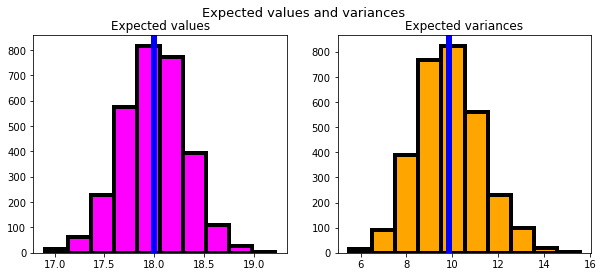

In [462]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
plt.suptitle("Expected values and variances", fontsize=13)

ax1.hist(expected_values, edgecolor='black', linewidth=4, color="magenta")
ax1.set_title("Expected values")
ax1.axvline(meanOfmeans_222, linewidth=6, color="blue")

ax2.hist(expected_variances, edgecolor="black", linewidth=4, color="orange")
ax2.set_title("Expected variances")
ax2.axvline(varianceOfvariances_22, linewidth=6 , color="blue")

plt.savefig("Binomial expected values and variances")
plt.show()

<p>
The law of large number is proved. Increasing the number of binomial experiments
approximates the theoretical expected variance to the calculated variance.
</p> 

<p>
The <b>confidence intervals</b> are interesting. (CI are discussed below.)
For CI's the standard deviations are needed.
</p> 

In [463]:
E_std_222 = np.sqrt(stats.describe(expected_values).variance)
V_std_222 = np.sqrt(stats.describe(expected_variances).variance)


In [464]:
E_ci_222_low, E_ci_222_up = stats.norm.interval(alpha=0.95, 
                                                loc=meanOfmeans_222, scale=E_std_222)
print(E_ci_222_low, E_ci_222_up)

17.372934670583888 18.62488532941611


In [465]:
V_ci_222_low, V_ci_222_up = stats.norm.interval(alpha=0.95,
                                               loc=varianceOfvariances_22,
                                               scale=V_std_222)
print(V_ci_222_low, V_ci_222_up)

7.128566960820178 12.612224756351539


### Binomial probability distributions

<p>
A simple definition of a probability distribution says that some outcomes are more likely than others.
A discrete random variable like colors of cars driving on a road has a limited number or finite of outcomes,
whereas the height of Orang-Utans is a continuous variable. A binomial random variable like a coin flip is
a discrete random variable and two outcomes: head or tail with head equals k as the success case.
</p> 

<p>
There are two conceptual distributions for a binomial discrete random variable:
</p> 
<ul>
  <li>
      The <b>probability mass function</b> allows to calculate the probability of a particular outcome k with a
      probability of success p from n coin flips (trials). Is p = 0.5 the coin is fair and every outcome has a
      chance of 0.5. Is it p = 0.7 the coin is biased and head has a higher chance. P has two meanings here. 
  </li>
  <li>
      The <b>probability cumulative distribution density function</b> (cdf) calculates the probability of
      successes k or fewer (heads). It adds the probabilities of the mass function for certain discrete
      outcomes. The cdf calculates the probability of successes for a certain range of interest.
  </li>
  
</ul> 

### binom.pmf / binom.cdf(x, n, p)

<p>
binom.pmf() calculates the probability of having exactly k heads out of n coin flips.
</p> 

<p>
In scipy.stats the probability mass function for binom is:<br>
binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)<br>
for k in {0, 1,..., n}.<br>
binom takes n and p as shape parameters.<br>
The probability cumulative function:<br> 
binomial.cdf(k, n, p) or binom.cdf(x, n, p)<br>
uses the same arguments, but is adds up the probabilities for every step up to k.
</p> 

<a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html" target="_blank">scipy.stats</a> 


What is the probability k = head will appear 25 times after 60 coin flips?

In [466]:
np.random.seed(57)
stats.binom.pmf(k=25, n=60, p=0.5) # k: successful outcomes, n: trials, p: probability

0.04502946450984524

You make some observations and determine customers of a shop are going to buy
product A (a red bowl) 30 times of 100, when visiting the aisle (trials). <br>
What ist the probability the red bowl is sold 14 times (successes) after 67 visits to the aisle?

In [467]:
np.random.seed(89)

pmf_1 = stats.binom.pmf(k=14, n=67, p=30/100)
print(pmf_1)
print(round(pmf_1*100,2), "%")

0.028874206970822266
2.89 %


The probability is low. This is intuitively understandable. 
If the bowl is sold 30 times of 100, the probability of 14 times of 67 should be lower.

In [468]:
pmf_2 = stats.binom.pmf(k=0, n=100, p=30/100)
print(round(pmf_2*100,2), "%")
# The p of no sales at all.

0.0 %


What is the probability of 30 or less sales out of 120 visits?

In [469]:
cmf_1 = stats.binom.cdf(k=30, n=120, p=0.3)
print("{}%".format(round(cmf_1*100),0))

14%


The p of more than 30 sales after 120 visits to the aisle.

In [470]:
sf_1 = stats.binom.sf(k=30, n=120, p=0.3)
print("{}%".format(round(sf_1*100),2))

86%


#### Conducting numerous trials supported by Python functionalities

<p>
helps understanding random processes. Conducting trials are overflowing
into a simulation, which is an approximate imitation of a process or system
over a sequence.
</p> 

<p>
As n gets larger the probability of getting head gets smaller for the same p.
As this is a fair coin scenario the number of successes should increase.
The probability of success in the pmf is a point estimation.
</p> 


<p>
At first: throwing a fair coin (p=0.5) n times, how likely head (success) is going to come up 5 times?
</p> 


In [471]:
np.random.seed(34)

print(stats.binom.pmf(k=5, n=5, p=0.5))
print(stats.binom.pmf(k=5, n=7, p=0.5))
print(stats.binom.pmf(k=5, n=10, p=0.5))
print(stats.binom.pmf(k=5, n=11, p=0.5))
print(stats.binom.pmf(k=5, n=50, p=0.5))
print(stats.binom.pmf(k=5, n=100, p=0.5))

0.03125
0.16406250000000008
0.24609375000000025
0.22558593750000003
1.8818369085237732e-09
5.939138117904783e-23


In [472]:
n_22 = np.arange(5,500,5)

p_22_dict = {}
for i in n_22:
    np.random.seed(12)
    p_22 = stats.binom.pmf(k=5, n=i, p=0.5)
    p_22_dict[i] = p_22

In [473]:
pmf_22_df = \
pd.DataFrame(p_22_dict.values(), index=p_22_dict.keys(), 
             columns=["P of success k"])
pmf_22_df.index.name = "n trials"
pmf_22_df.head()

,P of success k
n trials,
5,3.12E-02
10,2.46E-01
15,9.16E-02
20,1.48E-02
25,1.58E-03


In [474]:
k_list = np.arange(0,330,30)
print(type(k_list))

n_list = np.arange(0,550, 50)

index_1 = np.arange(0,11,1)
pd.DataFrame(list(zip(k_list, n_list)), index=index_1, columns=['k', 'n'])

<class 'numpy.ndarray'>


,k,n
0,0,0
1,30,50
2,60,100
3,90,150
4,120,200
5,150,250
6,180,300
7,210,350
8,240,400
9,270,450


In [475]:
for i,m in zip(k_list, n_list):
    print(stats.binom.pmf(k=i, n=m, p=0.5))

1.0
0.04185914925255199
0.010843866711637149
0.0032380490407807132
0.0010251040221101145
0.00033511233495657494
0.0001117992969674421
3.782536523678037e-05
1.2929774949875178e-05
4.454607234661577e-06
1.5442550112240126e-06


The lower the probability of p the less likely are successes or head or inversely.

In [476]:
np.random.seed(45)

print(stats.binom.pmf(k=8, n=10, p=0.1))
print(stats.binom.pmf(k=8, n=10, p=0.8))

3.645000000000009e-07
0.301989888


This function loops over list of the three input values of 
stats.binom.pmf simultaneously and 

In [477]:
def binom_pmf_sim(s, t, p):
    
    """This func loops over three dim 1 arrays or lists simultaneously
    and outputs stats.binom.pmf into a dict."""
    
    p_sim_list = []
    pd.set_option('display.float_format', '{:.2E}'.format)
    p_sim_df = pd.DataFrame(columns=["P of success"], index=p)
    
    for a,b,c in zip(s,t,p):
        
        h=stats.binom.pmf(k=a, n=b, p=c)
        p_sim_list.append(h)
                
        p_sim_df["P of success"] = h
        
        
    return p_sim_list, p_sim_df
    

Randomly generating input values for the binom_pmf_sim binom_pmf_sim.

In [478]:
np.random.seed(45)

k_33 = np.linspace(5,500, 100).flatten().tolist()
print(len(k_33))
print(np.shape(k_33))
print(type(k_33))
print(k_33[:10])

100
(100,)
<class 'list'>
[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0]


In [479]:
np.random.seed(45)

n_33 = np.linspace(5, 1000, 100).flatten().tolist()
print(len(n_33 ))

p_33 = np.tile(np.linspace(0, 1, 10), 10).flatten().tolist()
print(len(p_33))
print(p_33[15:21])

100
100
[0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0, 0.0]


In [480]:
pmf_33_l, pmf_33_df = binom_pmf_sim(k_33, n_33, p_33)

print(len(pmf_33_l))
print(pmf_33_l[:10])


100
[0.0, 5.005174097188337e-07, 4.492758898748847e-05, 0.0022671187442495286, 0.04065987766731142, 0.105364759560989, 0.009062744237806165, 1.3336339808361713e-06, 5.4185526287165515e-17, 0.0]


### Probability cumulative distribution function

In [481]:
p_k1 = {}

for k in np.arange(0,11,1):
    p_k1[k] = "{0:.4f}".format(stats.binom.cdf(k=k, n=10, p=0.5))

print(p_k1)

{0: '0.0010', 1: '0.0107', 2: '0.0547', 3: '0.1719', 4: '0.3770', 5: '0.6230', 6: '0.8281', 7: '0.9453', 8: '0.9893', 9: '0.9990', 10: '1.0000'}


In [482]:
p_1={}

for i in range(1,11):
    p_1[i] = round(stats.binom.cdf(k=i, n=10, p=0.5),5)
    
print(p_1)

{1: 0.01074, 2: 0.05469, 3: 0.17187, 4: 0.37695, 5: 0.62305, 6: 0.82812, 7: 0.94531, 8: 0.98926, 9: 0.99902, 10: 1.0}


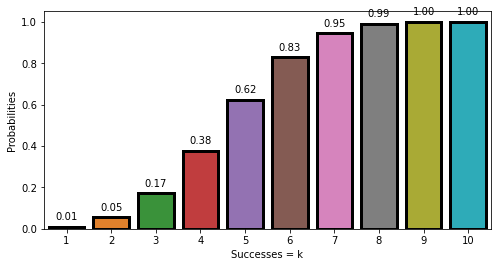

In [483]:
plt.figure(figsize=(8,4))

splot = sns.barplot(x=list(p_1.keys()), y=list(p_1.values()), edgecolor='black', linewidth=3)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    

plt.xlabel("Successes = k")
plt.ylabel("Probabilities")

plt.show()

#### Fraud detection of insurance claims

<p>
A insurance enterprise is considering claims. There are two possibilities. The claim is a fraud or the claim 
is not a fraud and justified. The company knows that 3/10 of insurance claims are fraudulent. 
They are using binomial probabilities as a first basic check.
</p> 

<p>
The insurer get 14 new claims. What is the probability that exactly 5 claims are fraudulent?
The probability is around 20%. This means 3 cases out of 14 are likely fraudulent.
Of course this does not say anything, which claim is fraudulent, but the 
insurance company can adjust the effort to find these cases accordingly. 
What is the probability of 7 fraudulent claims? And so on.
</p> 

In [484]:
fraud1 = round(stats.binom.pmf(k=5, n=14, p=0.3),4)*100
print(fraud1)

19.63


In [485]:
# What is the probability of 7 fraudulent claims?
fraud2 = round(stats.binom.sf(k=7, n=14, p=0.3),4)*100
print(fraud2)

3.15


In [486]:
# What is the probability of 4 or less fraudulent claims?
fraud3 = round(stats.binom.cdf(k=4, n=14, p=0.3),4)*100
print(fraud3)

58.42


In [487]:
# What is the probability of exactly 3 or 4 fraudulent claims?
fraud4 = round(stats.binom.pmf(k=3, n=14, p=0.3) + \
         stats.binom.pmf(k=4, n=14, p=0.3), 4)*100
print(fraud4)

42.34


In [488]:
# What is the probability of less than 3 or more than 5 fraudulent claims?
fraud5 = round(stats.binom.cdf(k=3, n=14, p=0.3) + \
         stats.binom.sf(k=5, n=14, p=0.3), 4)*100
print(fraud5 )

57.47


#### Determining the probabilities of defects

<p>
As quality manager you want to know understand the process of defects in 
the production of medical equipment you are responsible for. 
A defect rate of 3% is acceptable.
By taking a random sample of 100 pieces, what is the p given k defects?
Defects is a binomial random variable with the outcomes defect or not defect.
</p> 


In [489]:
pmf_defects = stats.binom.pmf(k=4, n=100, p=3/100)
print(pmf_defects)
print("{}%".format(round(pmf_defects*100, 0)))

0.1706055956116171
17.0%


Above the probability of getting exactly 3 defects.
Below the probability of getting exactly 10 defects.

In [490]:
pmf_defects_2 = stats.binom.pmf(k=10, n=100, p=0.03)
print(pmf_defects_2)
print("{}%".format(round(pmf_defects_2*100, 0)))

0.0006591336184905558
0.0%


Getting six "or less" defects, when taking a sample of 100.

In [491]:
cdf_defects = stats.binom.cdf(k=6, n=100, p=0.03)
print(cdf_defects)
print("{}%".format(round(cdf_defects*100),2))

0.9687724905686446
97%


In [492]:
cdf_defects_2 = stats.binom.cdf(k=1, n=100, p=0.03)
print(cdf_defects_2)
print("{}%".format(round(cdf_defects_2*100),2))

0.19462212006583648
19%


The probability of getting 6 or more defects.

In [493]:
sf_defects = stats.binom.sf(k=6, n=100, p=0.03)
print(sf_defects )
print("{}%".format(round(sf_defects*100),2))

0.031227509431355185
3%


<p>
The quality manager gets suspicious if he finds in his actual samples of 100 pieces
conducted at the real world production line more than 6 defects. With only 3% it is unlikely
that the binomial model with p=0.03 describes the actual process. He then searches
for the reasons of the mismatch. Maybe there is one machine not working well 
and produces more defects.
</p> 

<p>
However with this simple binomial model he does not know, whether or not 
his assumption about the process is true. He can go on putting resources into 
the measurement and taking samples of the production in the real world or he 
can try to simulate the real world processes and derive conclusions using inferential statistics.
</p> 

<p>
A common use case for simulation is the <b>Monte Carlo Simulation</b>.
</p> 

## Monte Carlo Simulation

<p>
The <b>Monte Carlo method</b> is a technique to improve decision making under uncertain 
conditions. For this purpose simulations are conducted "that randomly generate
values for independent variables, and then simulates a range of potential
process outcomes based on this set of randomly generated IVs. You can use
Monte Carlo methods to test hypotheses, to generate parameter estimates, to
predict scenario outcomes, and to validate models. The method is powerful
because it can be used to very quickly simulate anywhere from 1 to 10,000
(or more) simulation samples for any processes you are trying to evaluate.
Interestingly, this method was named after the infamous Casino de Monte
Carlo, in Monaco. ("Data Science for Dummies", 2015, p. 61)" It was first
developed by Stanislaw Ulam, a mathematician who worked on the Manhattan Project.
</p> 

According to <a href="https://www.ibm.com/cloud/learn/monte-carlo-simulation" target="_blank">IBM</a> every <b>Monte Carlo technique involves three basic steps</b>:

<ol>
<li>Set up the predictive model, identifying both the dependent variable to be predicted and the independent variables (also known as the input, risk or predictor variables) that will drive the prediction.</li>
<li>Specify probability distributions of the independent variables. Use historical data and/or the analyst’s subjective judgment to define a range of likely values and assign probability weights for each.</li>
<li>Run simulations repeatedly, generating random values of the independent variables. Do this until enough results are gathered to make up a representative sample of the near infinite number of possible combinations.</li>
</ol>

<p>
The basic steps are used here for understanding the problem taken from <b>"Data Science for Dummies"</b> ("Data Science for Dummies", 2015, p. 66):
</p> 

<p>
<b>Case study</b><br>
"Assume that you’re the quality assurance manager at a company that manufactures an important piece of medical equipment. These pieces of equipment are manufactured to order, and you estimate that, on average, 1 in 1,000
is defective. If a defective part is found, the manufacturing equipment must
be taken offline, checked, and reset. You want to determine how often this
must be done." The challenge here is to generate parameter estimates, which answer this question.
</p> 

<p>
<b>Identifying the components:</b><br>
</p> 

<ol>
<li>
The random variable is the number of parts inspected till a defective part is found. The input variable 
here is the estimation of 1/1000. The plant manager may have intuition or has made observations in the past 
like Stanislaw Ulam has done by observing the outcomes of playing countless games of solitaire. However
he cannot be sure that his observations reflect the true real world process. He could improve his judgement
by conducting a number of real world process experiments, but this would cost too much effort. Instead
he conducts Monte Carlo simulations. This way he is also able to adjust the estimation and build different
outcome scenarios.
</li>
<li>The probability distribution is geometric. The distribution shows the number of non‐
defective equipment pieces before you have a high probability
of discovering a defective piece of equipment
</li>
<li>
The representative sample created by simulations is the sampling distribution. The simulations are conducted in Python, so now have a look at the basic functions used here. </li>
</ol>



### Simulations of geometric distributions

<p>
The geometric distribution gives the probability that the first occurrence of success requires k independent trials, each with success probability p. If the probability of success on each trial is p, then the probability that the kth trial (out of k trials) is the first success.<br>
<a href="https://en.wikipedia.org/wiki/Geometric_distribution" target="_blank">Wikipedia</a> 
</p>



Using "scipy.stats.geom"geometric discrete random variables are created here.


In [494]:
r = stats.geom.rvs(1/1000, size=1000)

In [495]:
r.max()

6900

In [496]:
r.min()

1

In [497]:
r.mean()

984.003

In [498]:
n = stats.geom.rvs(1/1000, size=1000)
r.max()

6900

In [499]:
r = stats.geom.rvs(1/1000, size=1000)
r.max()
r.min()
n.mean()

998.344

### Sampling distributions

Now considering the concept of the concept of the <b>sampling distribution</b>:

<p>
"A point estimator is considered a random variable. It has its very own probability distribution, known as its sampling distribution. If the simulation is repeated enough times (usually 30 or more), you can assume that the sampling distribution is normal and that you can estimate its mean and variability, which allows you to conclude some things about the population values you’re estimating." (Datascience for Dummies, p. 67)
</p> 

<p>
Below a number of simulations is conducted by creating random numbers of the
geometric distribution. For every distribution a point estimation is taken.
This can be any point estimation like the mean or the standard deviation, but the
most common is the mean.
</p> 


#### Simulation 1

In [500]:
geom_simulation_n = 101 # number of simulations
geom_size = 1000 # number of geometric random variables
geom_probability = 0.001 # probability of success after failures

geom_distribution_means = []
geom_distributions = []

i=1
while i < geom_simulation_n:
    
    geom_dist = stats.geom.rvs(geom_probability, size=geom_size)
    geom_distributions.append(geom_dist)
    
    
    geom_mean = geom_dist.mean()
    geom_distribution_means.append(geom_mean)
    
    i += 1
    

Picking out one simulation from 100.

In [501]:
geom_distributions[15][:30]

array([ 477,  463, 2651,  978, 4791, 1574, 1660,  903, 1297, 2160, 1625,
        668, 2364,   84,  464,  202,  288, 1236,   59,   59, 6214,  276,
        308, 1066,  101, 1416,   30, 1067,  374,  461])

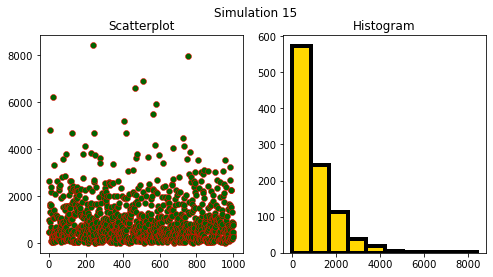

In [502]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
plt.suptitle("Simulation 15")

ax1.scatter(x=np.linspace(1,1000,1000), y =geom_distributions[15],
            edgecolor="red", linewidth=0.5, color="darkgreen")
ax1.set_title("Scatterplot")

ax2.hist(geom_distributions[15], color="gold",
        edgecolor="black", linewidth=4,
        align='mid')
ax2.set_title("Histogram")

plt.show()

Just from the look there are outliers.

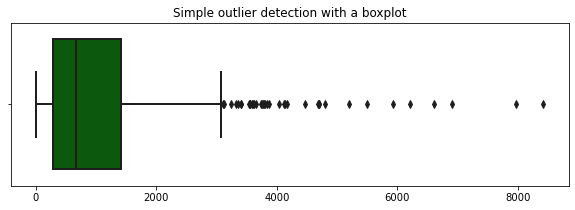

In [503]:
fig, ax = plt.subplots(1,1, figsize=(10,3))


ax = sns.boxplot(x=geom_distributions[15], orient="h", 
                 color="darkgreen", linewidth=2)
ax.set_title("Simple outlier detection with a boxplot")


plt.show()

(0.0, 4000.0)

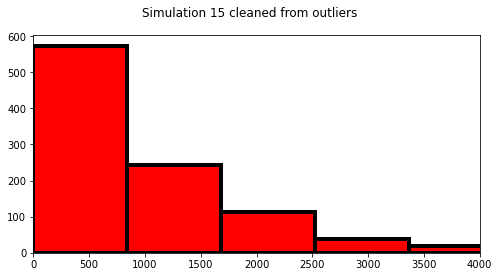

In [504]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
plt.suptitle("Simulation 15 cleaned from outliers")

ax.hist(geom_distributions[15], color="r",
        edgecolor="black", linewidth=4,
        align='mid')
ax.set_xlim([0,4000])

What does the confidence interval look like?<br>
A confidence interval is the probability that a population parameter (mean)<br>
will fall between a set a boundaries values a certain number of times (e.g. 95% - confidence level).<br>
The smaller the confidence interval the lower is the uncertainty.

In [505]:
ci_151, c_152   = stats.t.interval(alpha=0.95, df=len(geom_distributions[15])-1, 
                  loc=geom_distributions[15].mean(), 
                  scale=np.std(geom_distributions[15])) 

print(ci_151, c_152)

-1003.6397646376437 3001.089764637644


We are confident that the true value of the population mean falls between<br> 
(-1003.6397646376437, 3001.089764637644) in 95% of the times, if we would<br> 
take samples of the population over and over again.<br>
This is obviously not a good CI in terms of certainty.

<p>
Simulation 15 is not a normal distribution. This was to be expected. 
This does not matter. According to the concept of the sampling distribution and the central
limit theorem we can calculate point estimations (statistics) of the
population, even if the underlying simulated distributions are not normal.<br>
</p> 

### The central limit theorem

<p>
The central limit theorem then tells us that no matter what the distribution of the population is, the shape of the sampling distribution will approach normality as the sample size (N) increases.<br>
<a href="https://www.simplypsychology.org/central-limit-theorem.html" target="_blank">What is central limit theorem in statistics?</a>
</p> 


<p>
This in turn allows us to draw many conclusions with regard to statistical 
hypothesis testing from the normal distribution.
</p> 

<p>
So let's have a look at the averages of the simulated
distributions. The averages are building the sampling distribution. 
As for every other distribution for the sampling distribution 
descriptive statistics can be calculated,
showing the mean and the variability.
</p> 



In [506]:
print("Average of averages: {mean}".\
      format(mean=round(np.mean(geom_distribution_means),2)))

print("Minimum of simulation averages: {min}".\
      format(min=np.min(geom_distribution_means)))

print("Maximum of simulation averages: {max}".\
      format(max=np.max(geom_distribution_means)))

print("Standard deviation of simulation averages: {std}".\
      format(std=round(np.std(geom_distribution_means),2)))

print("0.25 quantile of simulation averages: {firstQuantile}".\
      format(firstQuantile=round(np.quantile(geom_distribution_means, 0.25),2)))

print("0.75 quantile of simulation averages: {thirdQuantile}".\
      format(thirdQuantile=round(np.quantile(geom_distribution_means, 0.75),2)))


Average of averages: 1004.55
Minimum of simulation averages: 931.292
Maximum of simulation averages: 1087.791
Standard deviation of simulation averages: 31.92
0.25 quantile of simulation averages: 982.15
0.75 quantile of simulation averages: 1023.46


Turning this into a helper function.

In [507]:
def point_estimations(dist):
    
    """This calculates statistics of the given sampling distribution
    and print those out. It additionally returns the statistics as a list in this 
    order: mean, median, minimum, maximum, std, quantiles."""
    
    if isinstance(dist, list):
        pass
    elif isinstance(dist, dict):
        dist = list(dist.values())
        
    statistics = []  
    
    mean = round(np.mean(dist),2)
    print("Average of simulation averages: {mean}".\
      format(mean=mean))
    statistics.append(mean)
    
    median = round(np.median(dist),2)
    print("Median of simulation averages: {median}".\
      format(median=median))
    statistics.append(median)
    
    minimum = round(np.min(dist), 2)
    print("Minimum of simulation averages: {min}".\
          format(min=minimum))
    statistics.append(minimum)
          
    maximum = round(np.max(dist),2)
    print("Maximum of simulation averages: {max}".\
          format(max=maximum))
    statistics.append(maximum)
    
    standarddeviation = round(np.std(dist),2)
    print("Standard deviation of simulation averages: {std}".\
          format(std=standarddeviation))
    statistics.append(standarddeviation)
    
    firstquantile = round(np.quantile(dist, 0.25),2)
    print("0.25 quantile of simulation averages: {firstQuantile}".\
      format(firstQuantile=firstquantile))
    statistics.append(firstquantile)
    
    thirdquantile = round(np.quantile(dist, 0.75),2) 
    print("0.75 quantile of simulation averages: {thirdQuantile}".\
      format(thirdQuantile=thirdquantile))
    statistics.append(thirdquantile)
    
    return (statistics)
    
    

In [508]:
help(point_estimations)

Help on function point_estimations in module __main__:

point_estimations(dist)
    This calculates statistics of the given sampling distribution
    and print those out. It additionally returns the statistics as a list in this 
    order: mean, median, minimum, maximum, std, quantiles.



In [509]:
dist1 = point_estimations(geom_distribution_means)

Average of simulation averages: 1004.55
Median of simulation averages: 1006.54
Minimum of simulation averages: 931.29
Maximum of simulation averages: 1087.79
Standard deviation of simulation averages: 31.92
0.25 quantile of simulation averages: 982.15
0.75 quantile of simulation averages: 1023.46


It seems the distributions has rather short tails.
Checking the calculations with pandas describe.

In [510]:
geom_distribution_means_df =pd.Series(geom_distribution_means)
geom_distribution_means_df.describe()

count   1.00E+02
mean    1.00E+03
std     3.21E+01
min     9.31E+02
25%     9.82E+02
50%     1.01E+03
75%     1.02E+03
max     1.09E+03
dtype: float64

In [511]:
ci_11, ci_12 = stats.norm.interval(alpha=0.95, loc=dist1[0], scale=dist1[4])
print("Lower boundary: {ci11}".format(ci11=round(ci_11, 2)))
print("Upper boundary: {c12}".format(c12=round(ci_12, 2)))

Lower boundary: 941.99
Upper boundary: 1067.11


In [512]:
print("Number of simulations: {n_simu}".\
          format(n_simu = len(geom_distribution_means)))


Number of simulations: 100


In [513]:
print("Averages of geometric distributions: {av}:".\
      format(av=geom_distribution_means))

Averages of geometric distributions: [970.278, 995.825, 1064.821, 984.545, 988.361, 1014.182, 977.385, 1050.883, 1012.109, 970.728, 1023.041, 1016.592, 980.787, 1011.779, 1015.427, 998.725, 971.679, 972.139, 939.992, 1001.845, 966.784, 1006.233, 1071.765, 1027.505, 979.989, 985.125, 1003.137, 1020.254, 1050.145, 1039.402, 1009.558, 957.808, 989.377, 1002.879, 1031.664, 1010.025, 1013.449, 958.642, 987.024, 969.558, 1024.439, 1021.287, 971.682, 1042.807, 1006.846, 994.03, 939.478, 991.55, 1059.545, 1004.033, 1029.467, 1018.259, 992.909, 975.114, 1011.812, 973.195, 982.598, 970.152, 1005.3, 1021.669, 1044.819, 1043.151, 1008.351, 1023.132, 1044.477, 1040.647, 1012.562, 1036.618, 1039.073, 1067.967, 999.541, 954.21, 1004.776, 1047.168, 1042.036, 970.626, 1022.096, 948.163, 1036.132, 957.79, 998.049, 989.512, 1008.77, 1009.473, 1016.697, 1016.093, 1015.82, 1009.851, 1027.88, 951.076, 965.141, 934.583, 999.314, 1041.358, 1004.724, 1006.029, 1087.791, 994.663, 931.292, 1025.775]:


C:\Users\gamarandor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


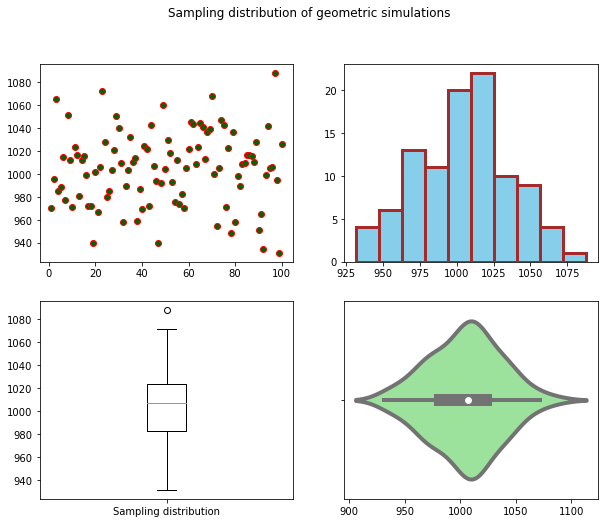

In [514]:
figure, axes = plt.subplots(2,2, figsize=(10,8))
plt.suptitle("Sampling distribution of geometric simulations")

axes[0,0].scatter(x=np.arange(1,101,1), y= geom_distribution_means,
                  color="darkgreen", edgecolor="r", linewidth=1)
axes[0,1].hist(geom_distribution_means, color="skyblue",
               edgecolor="brown", linewidth=3)
axes[1,0].boxplot(geom_distribution_means, 
                  labels=["Sampling distribution"])

axes[1,1] = sns.violinplot(geom_distribution_means, color="lightgreen",
                           edgecolor="magenta", linewidth=4)

plt.show()

This looks like a normal distribution. A lot of values are 
concentrated around the mean. Is the normal distribution
going to take even more shape if the number of simulations
is increased? Experimenting is better done with a function.

In [515]:
def geom_simulations(geom_simulation_n,
                     geom_size,
                     geom_probability):
    
    
        """ This function creates n geometric distributions
        with a given probability and an recurring number of 
        random variables per distribution (size).
        It take the means of the distributions and
        then returns the means (1) and then the distributions 
        (2) as dicts."""

        geom_distributions = {}
        geom_dist_means_dict = {}
     

        i=1
        while i < geom_simulation_n:


            geom_dist = stats.geom.rvs(geom_probability, size=geom_size)
            geom_distributions[i] = geom_dist

            geom_mean = geom_dist.mean()
            
            geom_dist_means_dict[i] = geom_mean
            
            

            i += 1
    
           
        return (geom_dist_means_dict, \
                geom_distributions)


In [516]:
help(geom_simulations)

Help on function geom_simulations in module __main__:

geom_simulations(geom_simulation_n, geom_size, geom_probability)
    This function creates n geometric distributions
    with a given probability and an recurring number of 
    random variables per distribution (size).
    It take the means of the distributions and
    then returns the means (1) and then the distributions 
    (2) as dicts.



Checking if the simulation works.

In [517]:
sims_2_means, sims_2 = geom_simulations(5,100,0.001)

print(sims_2_means)
print(type(sims_2_means))
print(len(sims_2_means))


{1: 1007.42, 2: 920.84, 3: 1035.36, 4: 1031.2}
<class 'dict'>
4


In [518]:
sims_2df =  pd.DataFrame(sims_2_means.values(), \
            index=sims_2_means.keys(),\
            columns=["Simulation means"])

sims_2df.head()

,Simulation means
1,1.01E+03
2,9.21E+02
3,1.04E+03
4,1.03E+03


It works!<br>
Maybe it is helpful to build a helper function for creating and sorting data frames.

In [519]:
def dict_df(dictionary):
    df =pd.DataFrame(dictionary.values(), \
                     index=dictionary.keys(),\
                     columns=["Simulation_means"])
    
    df.sort_values("Simulation_means", ascending=True, inplace=True)
    return df

In [520]:
sims31_df = dict_df(sims_2_means)
print(sims31_df.head())
print(sims31_df.tail())

   Simulation_means
2          9.21E+02
1          1.01E+03
4          1.03E+03
3          1.04E+03
   Simulation_means
2          9.21E+02
1          1.01E+03
4          1.03E+03
3          1.04E+03


#### Simulation 2
Let's increase the number of geometric simulations.

In [521]:
sims_31_means, sims_3 = geom_simulations(1000,1000,0.001)

print(type(sims_31_means))
print(type(sims_3))

<class 'dict'>
<class 'dict'>


In [522]:
dist31 = point_estimations(sims_31_means)

Average of simulation averages: 1002.18
Median of simulation averages: 1002.1
Minimum of simulation averages: 884.42
Maximum of simulation averages: 1099.63
Standard deviation of simulation averages: 32.2
0.25 quantile of simulation averages: 980.14
0.75 quantile of simulation averages: 1023.4


In [523]:
help(point_estimations)

Help on function point_estimations in module __main__:

point_estimations(dist)
    This calculates statistics of the given sampling distribution
    and print those out. It additionally returns the statistics as a list in this 
    order: mean, median, minimum, maximum, std, quantiles.



In [524]:
ci_21, ci_22 = stats.norm.interval(alpha=0.95, loc=dist31[0], scale=dist31[4])
print(ci_21, ci_22)

939.0691596978102 1065.2908403021897


We are confident that the true unknown population is contained within this interval 95% percent of the time, if we repeat the sampling over and over again.

In [525]:
def geomsim_dashboard(geom_distribution_means):

        figure, axes = plt.subplots(2,2, figsize=(10,8))
        plt.suptitle("Sampling distribution of geometric simulations")
        
        xvalues = np.arange(0,len(geom_distribution_means), 1)
        
        
        axes[0,0].scatter(x=xvalues, 
                          y=geom_distribution_means,
                          color="darkgreen", edgecolor="r", linewidth=1)
        axes[0,0].set_facecolor("lightyellow")
        axes[0,0].grid()
        
        # print(np.arange(0,len(geom_distribution_means),1))
        
        axes[0,1].hist(geom_distribution_means, color="skyblue",
                       edgecolor="brown", linewidth=3)
        axes[0,1].set_facecolor("lightyellow")
        axes[0,1].grid()        
        
        axes[1,0].boxplot(geom_distribution_means, 
                          labels=["Sampling distribution"])
        axes[1,0].set_facecolor("lightyellow")
        axes[1,0].grid()

        axes[1,1] = sns.violinplot(geom_distribution_means, 
                                   color="lightgreen",
                                   edgecolor="magenta", linewidth=4)
        axes[1,1].set_facecolor("lightyellow")
        axes[1,1].grid()

        plt.show()

C:\Users\gamarandor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


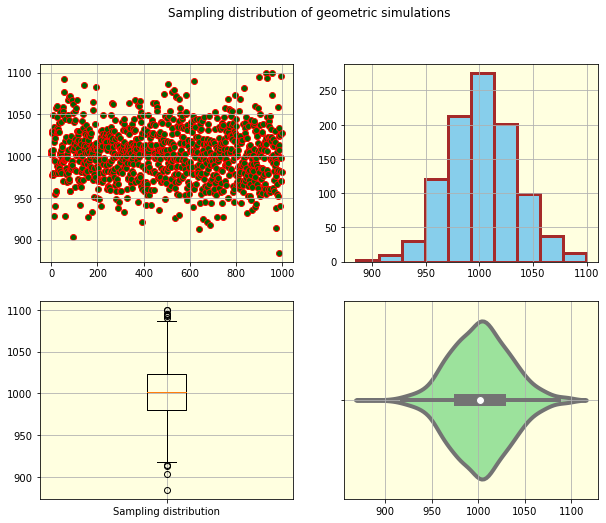

In [526]:
sims_31_means_list = list(sims_31_means.values())
geomsim_dashboard(sims_31_means_list)

#### Simulation 3

In [527]:
sims_4_means, sims_4 = geom_simulations(5000,1000,0.001)
sims_4_means_list = list(sims_4_means.values())

In [528]:
dist4 = point_estimations(sims_4_means)

Average of simulation averages: 999.67
Median of simulation averages: 999.79
Minimum of simulation averages: 894.18
Maximum of simulation averages: 1106.38
Standard deviation of simulation averages: 31.4
0.25 quantile of simulation averages: 978.79
0.75 quantile of simulation averages: 1020.8


In [529]:
ci_41, ci_42 = stats.norm.interval(alpha=0.95, loc=dist4[0], scale=dist4[4])
print(ci_41, ci_42)

938.1271308854423 1061.2128691145576


C:\Users\gamarandor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


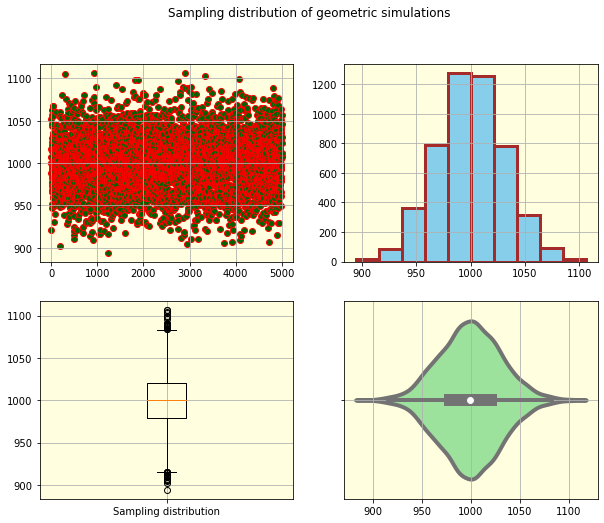

In [530]:
geomsim_dashboard(sims_4_means_list)

#### Simulation 5

In [531]:
sims_5_means, sims_5 = geom_simulations(15000,1000,0.001)
sims_5_means_list = list(sims_5_means.values())

C:\Users\gamarandor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


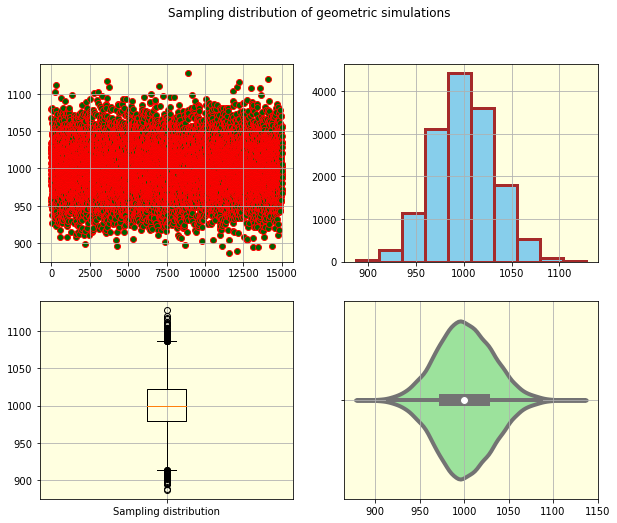

In [532]:
geomsim_dashboard(sims_5_means_list)

The last sampling distribution is nearly a perfect normal distribution. 
Assumably this sampling distribution is a good approximation of the population mean.

In [533]:
sim5_df = dict_df(sims_5_means)
print(sim5_df.head())
print(sim5_df.tail())

       Simulation_means
11571          8.87E+02
12056          8.89E+02
13428          8.95E+02
13127          8.95E+02
11132          8.96E+02
       Simulation_means
307            1.11E+03
12216          1.12E+03
3645           1.12E+03
14071          1.12E+03
8923           1.13E+03


In [534]:
dist5 = point_estimations(sims_5_means)

Average of simulation averages: 1000.17
Median of simulation averages: 999.28
Minimum of simulation averages: 887.14
Maximum of simulation averages: 1127.96
Standard deviation of simulation averages: 31.71
0.25 quantile of simulation averages: 978.78
0.75 quantile of simulation averages: 1021.84


In [535]:
help(point_estimations)

Help on function point_estimations in module __main__:

point_estimations(dist)
    This calculates statistics of the given sampling distribution
    and print those out. It additionally returns the statistics as a list in this 
    order: mean, median, minimum, maximum, std, quantiles.



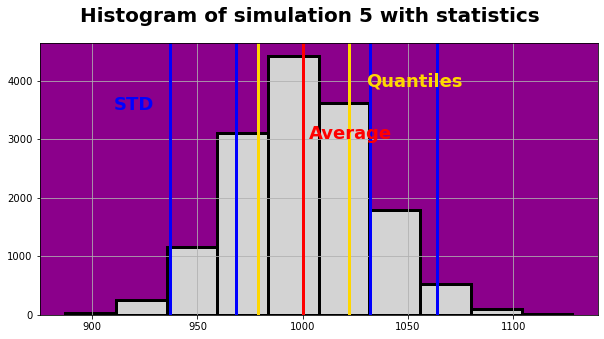

In [536]:
fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle("Histogram of simulation 5 with statistics", fontsize=20, fontweight="bold")

ax.grid()
ax.set_facecolor("darkmagenta")

ax.hist(list(sims_5_means.values()), color="lightgray",
             edgecolor="black", linewidth=3)

ax.axvline(dist5[5], color="gold", linewidth=3)
ax.axvline(dist5[6], color="gold", linewidth=3)
ax.axvline(dist5[0], color="red", linewidth=3)

ax.axvline(dist5[0]-31.71, color="blue", linewidth=3)
ax.axvline(dist5[0]+31.71, color="blue", linewidth=3)
ax.axvline(dist5[0]-(2*31.71), color="blue", linewidth=3)
ax.axvline(dist5[0]+(2*31.71), color="blue", linewidth=3)


ax.annotate("Average", (1003, 3000), color="r", fontsize=18, fontweight="bold")
ax.annotate("STD", (1000.17-90, 3500), color="b", fontsize=18, fontweight="bold")
ax.annotate("Quantiles", (1030, 3900), color="gold", fontsize=18, fontweight="bold")

plt.savefig("histStats")
plt.show()

For instance, based on the simulation described above, you guess that
the process produces a defective part about every 996th part produced.
Employing confidence intervals using the estimators derived from these
simulations, you can state the following:

In [537]:
ci5_low, ci5_up = stats.norm.interval(alpha=0.95, loc=dist5[0], scale=dist5[4])
print(ci5_low)
print(ci5_up)

938.0195420502348
1062.3204579497651


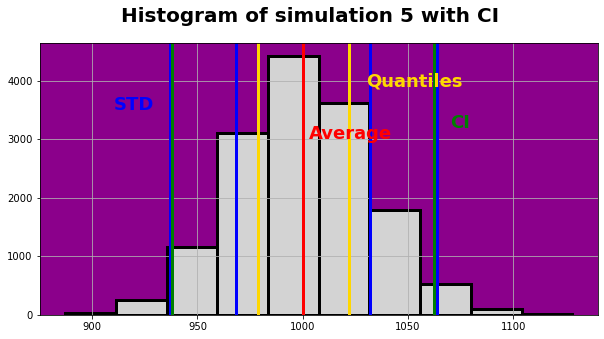

In [538]:
fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle("Histogram of simulation 5 with CI", fontsize=20, fontweight="bold")

ax.grid()
ax.set_facecolor("darkmagenta")

ax.hist(list(sims_5_means.values()), color="lightgray",
             edgecolor="black", linewidth=3)

ax.axvline(dist5[5], color="gold", linewidth=3)
ax.axvline(dist5[6], color="gold", linewidth=3)
ax.axvline(dist5[0], color="red", linewidth=3)

ax.axvline(dist5[0]-31.71, color="blue", linewidth=3)
ax.axvline(dist5[0]+31.71, color="blue", linewidth=3)
ax.axvline(dist5[0]-(2*31.71), color="blue", linewidth=3)
ax.axvline(dist5[0]+(2*31.71), color="blue", linewidth=3)

ax.axvline(ci5_low, color="green", linewidth=3)
ax.axvline(ci5_up, color="g", linewidth=3)

ax.annotate("Average", (1003, 3000), color="r", fontsize=18, fontweight="bold")
ax.annotate("STD", (1000.17-90, 3500), color="b", fontsize=18, fontweight="bold")
ax.annotate("Quantiles", (1030, 3900), color="gold", fontsize=18, fontweight="bold")
ax.annotate("CI", (1070, 3200), color="green", fontsize=18, fontweight="bold")
plt.show()

<p>
We are 95% confident that the true unknown population is contained in this interval 
(or if we repeatedly take a sample we get the true mean 95% of the time)
</p> 

<p>
Below the confidence intervals are brought into a nice dataframe for comparison.
</p> 

In [539]:
ci_list = [ci_11, ci_12, ci_151, c_152, ci_21, ci_22, ci_41, ci_42, ci5_low, ci5_up]
print(ci_list)
print(len(ci_list))

# list slicing [start:end:step]
lower_bounds = ci_list[0:9:2]
upper_bounds = ci_list[1:10:2]

print(lower_bounds)
print(len(lower_bounds))

print(upper_bounds)
print(len(upper_bounds))

[941.9879496134814, 1067.1120503865184, -1003.6397646376437, 3001.089764637644, 939.0691596978102, 1065.2908403021897, 938.1271308854423, 1061.2128691145576, 938.0195420502348, 1062.3204579497651]
10
[941.9879496134814, -1003.6397646376437, 939.0691596978102, 938.1271308854423, 938.0195420502348]
5
[1067.1120503865184, 3001.089764637644, 1065.2908403021897, 1061.2128691145576, 1062.3204579497651]
5


In [540]:
ci_boundaries_df = pd.DataFrame({"lower_bound":lower_bounds,"upper_bounds":upper_bounds})
ci_boundaries_df.index = [1, "Sample 15", 2, 3, 4]
ci_boundaries_df.index.name = "Simulation"
ci_boundaries_df

,lower_bound,upper_bounds
Simulation,,
1,9.42E+02,1.07E+03
Sample 15,-1.00E+03,3.00E+03
2,9.39E+02,1.07E+03
3,9.38E+02,1.06E+03
4,9.38E+02,1.06E+03


<p>
It shows that simulation 3 and 4 have got the smallest confidence intervals. 
This makes inferences from the samples to the population more insightful.
The number of samples taken decreases the range of the intervals.
This is aligned with the center limit theorem.
After a high number of samples it stops decreasing.
</p> 

### Probabilities as a parameter of control in Monte Carlo simulations


<p>
When creating random distributions the probability is usually a parameter of interest.
Holding number and size of simulations constant and changing the probabilities
results in the typical Monte Carlo graphics. The graphics depicts the range of 
potential outcomes depending on the input probabilities.
</p> 


In [541]:
help( geom_simulations)

Help on function geom_simulations in module __main__:

geom_simulations(geom_simulation_n, geom_size, geom_probability)
    This function creates n geometric distributions
    with a given probability and an recurring number of 
    random variables per distribution (size).
    It take the means of the distributions and
    then returns the means (1) and then the distributions 
    (2) as dicts.



In [542]:
geom_sim_means_2 = {}
geom_sim_dist_2 = {}

for i in [0.0001, 0.001, 0.01, 0.1, 1]:
    
    a,b  = geom_simulations(10,1000,i)
    geom_sim_means_2[i] = a
    geom_sim_dist_2[i] = b

In [543]:
print(len(list(geom_sim_dist_2[0.001].values())[0]))
print(list(geom_sim_dist_2[0.001].values())[0][:10])
print(list(geom_sim_dist_2[0.1].values())[0][:10])

1000
[ 760 1199  729  962  209   49  532 4778  107  231]
[17  1 10 27  2 12  4  3  1  4]


In [544]:
n_sim_100 = np.arange(1,10,1)

In [545]:
sim_00001 = list(geom_sim_means_2[0.0001].values())
sim_0001 = list(geom_sim_means_2[0.001].values())

sim_0001
# Every 1/1000 or 1000th piece of equipment is defect

[1004.743,
 1006.321,
 1044.287,
 964.463,
 1021.872,
 1032.47,
 1007.514,
 1016.137,
 964.969]

In [546]:
def dictv_toList(k, d):
    return (list(d[k].values()))

In [547]:
sim_001 = dictv_toList(0.01, d=geom_sim_means_2)
sim_01 = dictv_toList(0.1, d=geom_sim_means_2)
sim_1 = dictv_toList(1, d=geom_sim_means_2)

sim_1
# Every piece of equipment is defect.

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

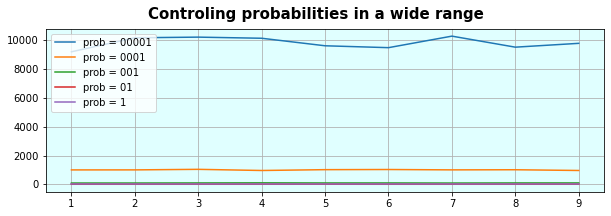

In [548]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.suptitle("Controling probabilities in a wide range", fontsize=15, fontweight="bold")

ax.set_facecolor("lightcyan")
#  Axes.grid(self, b=None, which='major', axis='both', **kwargs)
ax.grid()

ax.plot(n_sim_100, sim_00001, label="prob = 00001")
ax.plot(n_sim_100, sim_0001, label="prob = 0001")
ax.plot(n_sim_100, sim_001, label="prob = 001")
ax.plot(n_sim_100, sim_01, label="prob = 01")
ax.plot(n_sim_100, sim_1, label="prob = 1")

ax.legend(loc ="upper left")
plt.savefig("ControlProbas_1")
plt.show()

In [602]:
def proba_control(probas, sim_n=10, sim_size = 1000):
    
    """This function iterates over a list of probabilities.
    It returns the means and the distribution and also a dict with
    named keys:
    geom_sim_means: g
    a list of input propabilities: p
    dicts with p as keys and values as lists: n
    the generated random geometric distributions: d"""
    
    try:
        isinstance(probas, list)
    except TypeError:
        print("Probabilities must be of type list!")
    
    for e in probas:
            if e == 0:
                raise ValueError("The probability cannot be zero!")

    
    geom_sim_means = {}
    geom_sim_dist = {}
    geom_sim_names = {}
    

    for i in probas:
    
        a,b  = geom_simulations(sim_n,sim_size,i)
        
        geom_sim_means[i] = a
        geom_sim_dist[i] = b

       
    for k,v in geom_sim_means.items():
        
        l =  list(geom_sim_means[k].values())
        n = str(k)
        geom_sim_names[n] = l
        geom_sim_names[n].insert(0,0)

    
    
    return (geom_sim_means, probas, geom_sim_names, geom_sim_dist)

In [603]:
probas_2 = [0.001, 0.002, 0.003, 0.004, 0.005]
probas_3 = [0.00011, 0.00012, 0.00013, 0.00014, 0.00015]

In [604]:
g2, p2, n2, d2 = proba_control(probas_2)
g3, p3, n3, d3 = proba_control(probas_3)

In [606]:
# checking the returned structures
print(g2[0.002])
print(p2)
print(type(n2))
print(n2['0.001'])
print(len(n2['0.001']))

{1: 478.636, 2: 477.651, 3: 490.64, 4: 509.713, 5: 455.059, 6: 495.03, 7: 485.729, 8: 492.954, 9: 490.472}
[0.001, 0.002, 0.003, 0.004, 0.005]
<class 'dict'>
[0, 1030.8, 1016.01, 958.302, 962.553, 1008.498, 1022.744, 975.228, 1002.783, 968.063]
10


In [607]:
print(g2[0.001])

{1: 1030.8, 2: 1016.01, 3: 958.302, 4: 962.553, 5: 1008.498, 6: 1022.744, 7: 975.228, 8: 1002.783, 9: 968.063}


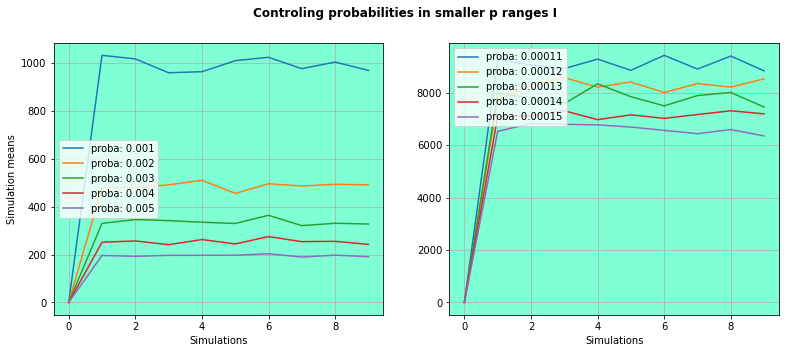

In [608]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
xValues1 = np.arange(0,10,1)
plt.suptitle("Controling probabilities in smaller p ranges I", 
             fontweight="bold")

for i in p2:
    # print(i)
    ax1.grid()
    ax1.set_facecolor('aquamarine')
    ax1.plot(xValues1, n2[str(i)], 
             label="proba: "+str(i))
    ax1.legend(loc='center left') 
    ax1.set_ylabel("Simulation means")
    ax1.set_xlabel("Simulations")
    
for i in p3:
    # print(i)
    ax2.grid()
    ax2.set_facecolor('aquamarine')
    ax2.plot(xValues1, n3[str(i)], 
             label="proba: "+str(i))
    
    ax2.legend(loc='upper left') 
    ax2.set_xlabel("Simulations")

plt.savefig("ControlProbsSmallerRang")    
plt.show()


In [609]:
help(geom_simulations)

Help on function geom_simulations in module __main__:

geom_simulations(geom_simulation_n, geom_size, geom_probability)
    This function creates n geometric distributions
    with a given probability and an recurring number of 
    random variables per distribution (size).
    It take the means of the distributions and
    then returns the means (1) and then the distributions 
    (2) as dicts.



#### Increasing the number of input p to 100

while holding the number and size of the distributions constant.

In [610]:
np.random.seed(42)
probas_5 = np.linspace(0.0001, 0.000290, 100)

print(len(probas_5 ))
print(probas_5[:20])

100
[0.0001     0.00010192 0.00010384 0.00010576 0.00010768 0.0001096
 0.00011152 0.00011343 0.00011535 0.00011727 0.00011919 0.00012111
 0.00012303 0.00012495 0.00012687 0.00012879 0.00013071 0.00013263
 0.00013455 0.00013646]


In [611]:
np.random.seed(42)
probas_6 = np.linspace(0.001, 0.004, 100)

print(len(probas_6))
print(probas_6[:20])

100
[0.001      0.0010303  0.00106061 0.00109091 0.00112121 0.00115152
 0.00118182 0.00121212 0.00124242 0.00127273 0.00130303 0.00133333
 0.00136364 0.00139394 0.00142424 0.00145455 0.00148485 0.00151515
 0.00154545 0.00157576]


In [612]:
help(proba_control)

Help on function proba_control in module __main__:

proba_control(probas, sim_n=10, sim_size=1000)
    This function iterates over a list of probabilities.
    It returns the means and the distribution and also a dict with
    named keys:
    geom_sim_means: g
    a list of input propabilities: p
    dicts with p as keys and values as lists: n
    the generated random geometric distributions: d



In [613]:
g5, p5, n5, d5 = proba_control(probas_5)
g6, p6, n6, d6 = proba_control(probas_6)

print("sim means: ", g5[0.0001])
print("p: ", p5[:5]) # 5 of 100
print("dist 5", d5[0.0001][3][:7]) # a slice of dist 3 of 10 with p 0.0001

sim means:  {1: 9725.067, 2: 10351.138, 3: 10031.747, 4: 9611.693, 5: 9768.315, 6: 10058.174, 7: 9814.466, 8: 9314.285, 9: 9396.255}
p:  [0.0001     0.00010192 0.00010384 0.00010576 0.00010768]
dist 5 [ 3034  2837 23671  2871  3174 14246  5974]


#### Calculating the mean of the simulation means
<p>
as an indication of expected outcomea. Practically the values are extracted from a dictionary 
of dictionaries:
</p> 


In [614]:
print("Sim 0.0001, mean 1:", g5[0.0001][1])
print("Sim 0.0001:", g5[0.0001])
print("Mean of means of simulation 0.0001:", np.mean(list(g5[0.0001].values())))

Sim 0.0001, mean 1: 9725.067
Sim 0.0001: {1: 9725.067, 2: 10351.138, 3: 10031.747, 4: 9611.693, 5: 9768.315, 6: 10058.174, 7: 9814.466, 8: 9314.285, 9: 9396.255}
Mean of means of simulation 0.0001: 9785.682222222224


In [615]:
def meanOfmeans(seq_means, probas):
    
    """This func takes a dict of dicts of sim means:
    and calculates the means for every simulation p and
    then calculates the overall mean. It returns:
    float: overall mean,
    dict: mean of means."""
    
    meanOfmeans = {}
    
    
    for p in probas:
        mean = np.mean(list(seq_means[p].values()))
        meanOfmeans[p] = mean
    
    overall_mean = np.mean(list(meanOfmeans.values()))
    
    return overall_mean, meanOfmeans


In [616]:
help(meanOfmeans)

Help on function meanOfmeans in module __main__:

meanOfmeans(seq_means, probas)
    This func takes a dict of dicts of sim means:
    and calculates the means for every simulation p and
    then calculates the overall mean. It returns:
    float: overall mean,
    dict: mean of means.



In [617]:
overall_mean_5, meanOfmeans_5 = meanOfmeans(seq_means=g5, probas=p5)
overall_mean_6, meanOfmeans_6 = meanOfmeans(seq_means=g6, probas=p6)

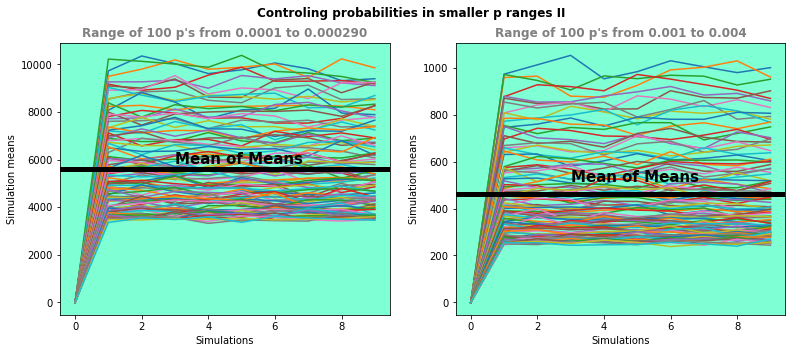

In [618]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
xValues1 = np.arange(0,10,1)
plt.suptitle("Controling probabilities in smaller p ranges II", 
             fontweight="bold")

for i in p5:
    # print(i)
    ax1.grid()
    ax1.set_facecolor('aquamarine')
    ax1.plot(xValues1, n5[str(i)], 
             label="proba: "+str(i))
    # ax1.legend(loc='center left') 
    ax1.set_ylabel("Simulation means")
    ax1.set_xlabel("Simulations")
    
ax1.annotate("Mean of Means", (3, overall_mean_5 + 200), fontsize=15, fontweight="bold")
ax1.axhline(y=overall_mean_5, xmin=0, xmax=9, linewidth=5, color="black")
ax1.set_title("Range of 100 p's from 0.0001 to 0.000290", fontweight="bold", color="gray")
    
for i in p6:
    # print(i)
    ax2.grid()
    ax2.set_facecolor('aquamarine')
    ax2.plot(xValues1, n6[str(i)], 
             label="proba: "+str(i))
    # ax1.legend(loc='center left') 
    ax2.set_ylabel("Simulation means")
    ax2.set_xlabel("Simulations")

    
ax2.axhline(y=overall_mean_6, xmin=0, xmax=9, linewidth=5, color="black")
ax2.annotate("Mean of Means", (3, overall_mean_6 + 50), fontsize=15, fontweight="bold")
ax2.set_title("Range of 100 p's from 0.001 to 0.004", fontweight="bold", color="gray")

plt.savefig("MC_100_p")
plt.show()

In [564]:
print(overall_mean_5)

5619.55592


#### How do you interpret the graphic?


<p>
It depends on the desired outcomes and the risk appetite. Simulations 
are nothing more than a tool under uncertainty. It gives a range 
of possible outcomes depending on input probabilities. In the range
of 0.0001 to 0.000290 most simulations are around 5619. A defect per 
5619 devices. Is this acceptable or not? Maybe this is not and the quality process
should be optimized or it is and maybe less quality is traded off against higher
output. If a acceptable number of defects is decided on, the probability is given,
and then a closer look is taken with a histogram like above. This
helps to understand the probability distribution with confidence intervals,
standard deviation, minima and maxima. Again this helps estimating the risk
someone is willing to carry. Testing out different probability levels and histograms
are a search to find the desired level of risk and outcome. A Monte Carlo simulation is not a stringent mathematical solution. It cannot be as it applies the concept of randomness.
</p> 
